In [1]:
cd ..

/home/dmitriishubin/Desktop/Thesis/HepaticVessel_experiment


In [6]:
import pandas as pd
import numpy as np
import pydicom as dicom
import nibabel as nib
import os
from sklearn.model_selection import KFold,train_test_split
import json
import matplotlib.pyplot as plt

In [3]:
img = nib.load('../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii.gz')
img = np.array(img.dataobj)

In [4]:
img.shape

(240, 240, 155)

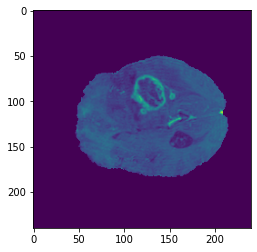

In [7]:
plt.imshow(img[:,:,70])

In [13]:
patients = [i for i in os.listdir('../data/brats/MICCAI_BraTS2020_TrainingData/') if i.find('.')==-1]

In [14]:
patients

['BraTS20_Training_294',
 'BraTS20_Training_354',
 'BraTS20_Training_344',
 'BraTS20_Training_024',
 'BraTS20_Training_042',
 'BraTS20_Training_130',
 'BraTS20_Training_053',
 'BraTS20_Training_142',
 'BraTS20_Training_001',
 'BraTS20_Training_135',
 'BraTS20_Training_162',
 'BraTS20_Training_369',
 'BraTS20_Training_136',
 'BraTS20_Training_061',
 'BraTS20_Training_260',
 'BraTS20_Training_096',
 'BraTS20_Training_224',
 'BraTS20_Training_127',
 'BraTS20_Training_134',
 'BraTS20_Training_129',
 'BraTS20_Training_014',
 'BraTS20_Training_314',
 'BraTS20_Training_206',
 'BraTS20_Training_232',
 'BraTS20_Training_031',
 'BraTS20_Training_361',
 'BraTS20_Training_270',
 'BraTS20_Training_341',
 'BraTS20_Training_080',
 'BraTS20_Training_261',
 'BraTS20_Training_196',
 'BraTS20_Training_146',
 'BraTS20_Training_157',
 'BraTS20_Training_250',
 'BraTS20_Training_350',
 'BraTS20_Training_362',
 'BraTS20_Training_352',
 'BraTS20_Training_332',
 'BraTS20_Training_325',
 'BraTS20_Training_132',


In [12]:
patients[0][:-7]

'BraTS20_Train'

In [ ]:
names = []

os.makedirs('../data/Task06_Lung/processed_data',exist_ok=True)

count = 0

for patient in patients:
    img = nib.load(f'../data/Task06_Lung/imagesTr/{patient}')
    img = np.array(img.dataobj)
    seg = nib.load(f'../data/Task06_Lung/labelsTr/{patient}')
    seg = np.array(seg.dataobj)
    
    patient = patient[:-7]
    
    os.makedirs(f'../data/Task06_Lung/processed_data/{patient}',exist_ok=True)
    
    for i in range(img.shape[-1]):
        temp_img = img[:,:,i].reshape(320, 320,1)
        temp_seg = seg[:,:,i].reshape(320, 320,1)
        
        
        np.save(f'../data/Task06_Lung/processed_data/{patient}/{i}.npy',temp_img)
        np.save(f'../data/Task06_Lung/processed_data/{patient}/{i}_seg.npy',temp_seg)
        count+=1
            

In [8]:
for index,patient in enumerate(patients):
    patients[index]=patient[:-7]

In [ ]:
patients = np.array(patients)

kf = KFold(5,shuffle=True,random_state=42)
for fold,(train_index, test_index) in enumerate(kf.split(patients)):
    patients_train, patients_test = patients[train_index], patients[test_index]
    
    images_train = []
    for patient in patients_train:
        images_train+=[
                f'../data/brats/MICCAI_BraTS2020_TrainingData/{patient}/'+i[:-4]
                for i in sorted(os.listdir(f'../data/brats/MICCAI_BraTS2020_TrainingData/{patient}/'))
                if i.find('.npy') != -1 and i.find('seg') == -1
            ]
    
    
    images_val = []
    for patient in patients_test:
        images_val+=[
                f'../data/brats/MICCAI_BraTS2020_TrainingData/{patient}/'+i[:-4]
                for i in sorted(os.listdir(f'../data/brats/MICCAI_BraTS2020_TrainingData/{patient}/'))
                if i.find('.npy') != -1 and i.find('seg') == -1
            ]
        
    
    split = {
        'train': images_train,
        'val': images_val,
    }
    
    
    with open(f'../data/split_table/{fold}_split_table.json', 'w') as outfile:
            json.dump(split, outfile)

In [9]:
patients

['spleen_18',
 'spleen_63',
 'spleen_16',
 'spleen_41',
 'spleen_62',
 'spleen_6',
 'spleen_47',
 'spleen_61',
 'spleen_60',
 'spleen_59',
 'spleen_22',
 'spleen_28',
 'spleen_25',
 'spleen_14',
 'spleen_3',
 'spleen_17',
 'spleen_52',
 'spleen_49',
 'spleen_56',
 'spleen_24',
 'spleen_40',
 'spleen_13',
 'spleen_45',
 'spleen_9',
 'spleen_26',
 'spleen_46',
 'spleen_38',
 'spleen_21',
 'spleen_32',
 'spleen_53',
 'spleen_12',
 'spleen_19',
 'spleen_20',
 'spleen_27',
 'spleen_29',
 'spleen_8',
 'spleen_44',
 'spleen_33',
 'spleen_31',
 'spleen_2',
 'spleen_10']

In [38]:
patients = np.array(patients)

for fold in range(5):

    patients_train, patients_test = train_test_split(patients, test_size=0.2, random_state=fold)

    patients_train, patients_val = train_test_split(patients_train, test_size=0.2, random_state=fold)

    images_train = []
    for patient in patients_train:
        images_train+=[
                f'../data/brats/MICCAI_BraTS2020_TrainingData/{patient}/'+i[:-7]
                for i in sorted(os.listdir(f'../data/brats/MICCAI_BraTS2020_TrainingData/{patient}/'))
                if i.find('.npy') != -1 and i.find('seg') == -1 and i.find('_t2')!=-1
            ]


    images_val = []
    for patient in patients_val:
        images_val+=[
                f'../data/brats/MICCAI_BraTS2020_TrainingData/{patient}/'+i[:-7]
                for i in sorted(os.listdir(f'../data/brats/MICCAI_BraTS2020_TrainingData/{patient}/'))
                if i.find('.npy') != -1 and i.find('seg') == -1 and i.find('_t2')!=-1
            ]

    images_test = []
    for patient in patients_test:
        images_test+=[
                f'../data/brats/MICCAI_BraTS2020_TrainingData/{patient}/'+i#[:-7]
                for i in sorted(os.listdir(f'../data/brats/MICCAI_BraTS2020_TrainingData/{patient}/'))
                if i.find('.npy') != -1 and i.find('seg') == -1 and i.find('_t2')!=-1
            ]


    split = {
        'train': images_train,
        'val': images_val,
        'test': images_test,
    }


    with open(f'../data/split_table/{fold}_split_table.json', 'w') as outfile:
            json.dump(split, outfile)

In [40]:
images_test

['../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_328/BraTS20_Training_328_0_flair.npy',
 '../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_328/BraTS20_Training_328_0_t1.npy',
 '../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_328/BraTS20_Training_328_0_t1ce.npy',
 '../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_328/BraTS20_Training_328_0_t2.npy',
 '../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_328/BraTS20_Training_328_100_flair.npy',
 '../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_328/BraTS20_Training_328_100_t1.npy',
 '../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_328/BraTS20_Training_328_100_t1ce.npy',
 '../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_328/BraTS20_Training_328_100_t2.npy',
 '../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_328/BraTS20_Training_328_101_flair.npy',
 '../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_328/BraTS20_Training_32

In [29]:
len(patients_train)

236

In [30]:
len(patients_val)

59

In [31]:
len(patients_test)

74

In [ ]:
f'../data/Task02_Heart/processed_data/{patients_train}/'